In [1]:
%matplotlib inline
import astropy.io.fits as fits
import numpy as np
import  matplotlib.pyplot as plt


In [2]:
import tools
import imp
imp.reload(tools)
from tools import *

In [3]:
#it takes too long to load all of the data, so I commented out them
#arnaud_elg = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/ebv1000_arnaud/subset/sim_ebv1000_arnaud.fits')#1
#lrg = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/wise_ebv1000/subset/sim_wise_ebv1000.fits')#2
#faint = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/wise_ebv1000_faint/subset/sim_wise_ebv1000_faint.fits')#3
dr9_lrg = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/real_lrg_seed/subset/sim_real_lrg_seed.fits')

#dat=dict({1:arnaud_elg,2:lrg,3:faint,4:dr9_lrg})
dat = dict({4:dr9_lrg})

#sel1 = arnaud_elg['detected']&(arnaud_elg['maskbits']==0)
#sel2 = lrg['detected']&(lrg['maskbits']==0)
#sel3 = faint['detected']&(faint['maskbits']==0)
sel4 = dr9_lrg['detected']&(dr9_lrg['maskbits']==0)

#sel = dict({1:sel1,2:sel2,3:sel3,4:sel4})
sel = dict({4:sel4})

##### histgrams

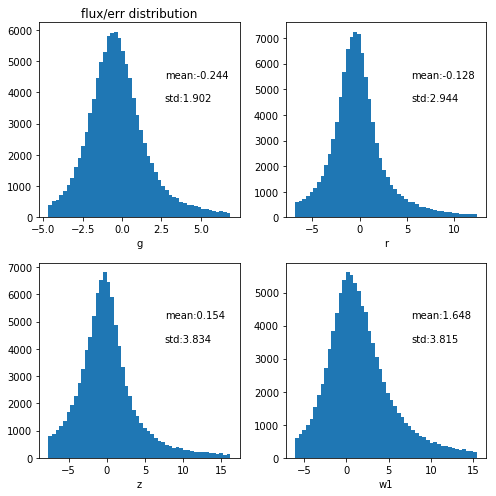

In [4]:
plt.figure(figsize=(7,7))
i=4

plt.subplot(2,2,1)
delta_g = (dat[i][sel[i]]['flux_g']-dat[i][sel[i]]['sim_gflux'])*np.sqrt(dat[i][sel[i]]['flux_ivar_g'])
one_subplot_hist('flux/err distribution',delta_g,xlabel='g',percentile=3)

plt.subplot(2,2,2)
delta_r = (dat[i][sel[i]]['flux_r']-dat[i][sel[i]]['sim_rflux'])*np.sqrt(dat[i][sel[i]]['flux_ivar_r'])
one_subplot_hist(None,delta_r,xlabel='r',percentile=3)

plt.subplot(2,2,3)
delta_z = (dat[i][sel[i]]['flux_z']-dat[i][sel[i]]['sim_zflux'])*np.sqrt(dat[i][sel[i]]['flux_ivar_z'])
one_subplot_hist(None,delta_z,xlabel='z',percentile=3)

plt.subplot(2,2,4)
w1flux = 10**(-0.4*(dat[i][sel[i]]['sim_w1']-22.5))*dat[i][sel[i]]['mw_transmission_w1']
delta_w1 = (dat[i][sel[i]]['flux_w1']-w1flux)*np.sqrt(dat[i][sel[i]]['flux_ivar_w1'])
one_subplot_hist(None,delta_w1,xlabel='w1',percentile=3)

plt.tight_layout()                                                                                                                        

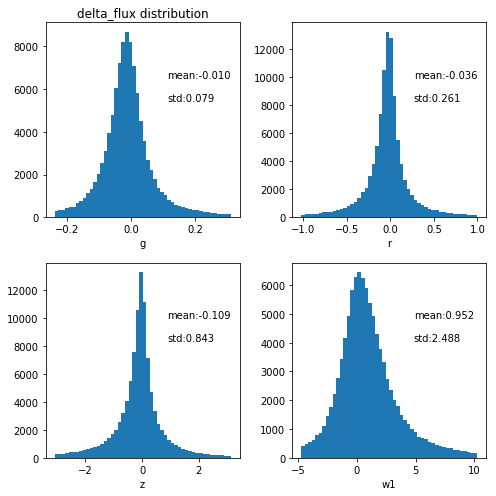

In [5]:
plt.figure(figsize=(7,7))
i=4

plt.subplot(2,2,1)
delta_g = (dat[i][sel[i]]['flux_g']-dat[i][sel[i]]['sim_gflux'])
one_subplot_hist('delta_flux distribution',delta_g,xlabel='g',percentile=3)

plt.subplot(2,2,2)
delta_r = (dat[i][sel[i]]['flux_r']-dat[i][sel[i]]['sim_rflux'])
one_subplot_hist(None,delta_r,xlabel='r',percentile=3)

plt.subplot(2,2,3)
delta_z = (dat[i][sel[i]]['flux_z']-dat[i][sel[i]]['sim_zflux'])
one_subplot_hist(None,delta_z,xlabel='z',percentile=3)

plt.subplot(2,2,4)
w1flux = 10**(-0.4*(dat[i][sel[i]]['sim_w1']-22.5))*dat[i][sel[i]]['mw_transmission_w1']
delta_w1 = (dat[i][sel[i]]['flux_w1']-w1flux)
one_subplot_hist(None,delta_w1,xlabel='w1',percentile=3)

plt.tight_layout()  

#### 2d histogram

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:54: RuntimeWarning: invalid value encountered in greater
  sel = (mag_diff>-10e9)&(mag_diff<=10e9)
/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:54: RuntimeWarning: invalid value encountered in less_equal
  sel = (mag_diff>-10e9)&(mag_diff<=10e9)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid v

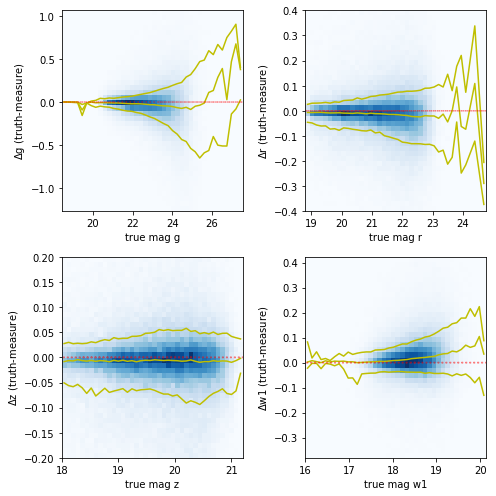

In [6]:
i=4
plt.figure(figsize = (7,7))

plt.subplot(2,2,1)
mag_z_true = 22.5 - 2.5 * np.log10(dat[i]['sim_zflux']/dat[i]['mw_transmission_z'])


mag_g_true = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['sim_gflux']/dat[i][sel[i]]['mw_transmission_g'])
mag_g_measure = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['flux_g']/dat[i][sel[i]]['mw_transmission_g'])
sel2 = (mag_g_true<28)&(mag_g_true>16)

one_subplot_magnitude('g',mag_g_true[sel2],mag_g_true[sel2]-mag_g_measure[sel2],ymin=-2,ymax=2)

plt.subplot(2,2,2)
mag_r_true = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['sim_rflux']/dat[i][sel[i]]['mw_transmission_r'])
mag_r_measure = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['flux_r']/dat[i][sel[i]]['mw_transmission_r'])
sel2 = (mag_r_true<28)&(mag_r_true>16)

one_subplot_magnitude('r',mag_r_true[sel2],mag_r_true[sel2]-mag_r_measure[sel2],ymin=-0.4,ymax=0.4)


plt.subplot(2,2,3)
mag_z_true = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['sim_zflux']/dat[i][sel[i]]['mw_transmission_z'])
mag_z_measure = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['flux_z']/dat[i][sel[i]]['mw_transmission_z'])
sel2 = (mag_z_true<28)&(mag_z_true>16)
one_subplot_magnitude('z',mag_z_true[sel2],mag_z_true[sel2]-mag_z_measure[sel2],ymin=-0.2,ymax=0.2)


plt.subplot(2,2,4)
mag_w1_true = dat[i][sel[i]]['sim_w1']
mag_w1_measure = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['flux_w1']/dat[i][sel[i]]['mw_transmission_w1'])
sel2 = (mag_w1_true<28)&(mag_w1_true>16)
w1flux = 10**(-0.4*(dat[i]['sim_w1']-22.5))*dat[i]['mw_transmission_w1']
delta_flux = (dat[i][sel[i]]['flux_w1']-w1flux[sel[i]])*np.sqrt(dat[i][sel[i]]['flux_ivar_w1'])
one_subplot_magnitude('w1',mag_w1_true[sel2],mag_w1_true[sel2]-mag_w1_measure[sel2],ymin=-0.5,ymax=0.5)

plt.tight_layout()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in log10


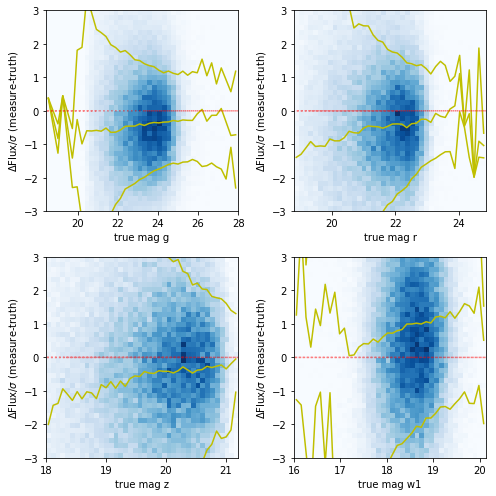

In [7]:
i=4
plt.figure(figsize = (7,7))

plt.subplot(2,2,1)

mag_g_true = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['sim_gflux']/dat[i][sel[i]]['mw_transmission_g'])
flux_diff_g = (dat[i][sel[i]]['flux_g']-dat[i][sel[i]]['sim_gflux'])*np.sqrt(dat[i][sel[i]]['flux_ivar_g'])
sel2 = (mag_g_true<28)&(mag_g_true>16)
one_subplot_flux('g',mag_g_true[sel2],flux_diff_g[sel2])

plt.subplot(2,2,2)
mag_r_true = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['sim_rflux']/dat[i][sel[i]]['mw_transmission_r'])
flux_diff_r = (dat[i][sel[i]]['flux_r']-dat[i][sel[i]]['sim_rflux'])*np.sqrt(dat[i][sel[i]]['flux_ivar_r'])
sel2 = (mag_r_true<28)&(mag_r_true>16)

one_subplot_flux('r',mag_r_true[sel2],flux_diff_r[sel2])


plt.subplot(2,2,3)
mag_z_true = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['sim_zflux']/dat[i][sel[i]]['mw_transmission_z'])
flux_diff_z = (dat[i][sel[i]]['flux_z']-dat[i][sel[i]]['sim_zflux'])*np.sqrt(dat[i][sel[i]]['flux_ivar_z'])
sel2 = (mag_z_true<28)&(mag_z_true>16)
one_subplot_flux('z',mag_z_true[sel2],flux_diff_z[sel2])


plt.subplot(2,2,4)
mag_w1_true = dat[i][sel[i]]['sim_w1']
mag_w1_measure = 22.5 - 2.5 * np.log10(dat[i][sel[i]]['flux_w1']/dat[i][sel[i]]['mw_transmission_w1'])
sel2 = (mag_w1_true<28)&(mag_w1_true>16)
w1flux = 10**(-0.4*(dat[i]['sim_w1']-22.5))*dat[i]['mw_transmission_w1']
delta_flux_w1 = (dat[i][sel[i]]['flux_w1']-w1flux[sel[i]])*np.sqrt(dat[i][sel[i]]['flux_ivar_w1'])
one_subplot_flux('w1',mag_w1_true[sel2],delta_flux_w1[sel2])

plt.tight_layout()

In [8]:
len(np.unique(dat[i]['brickname']))

599

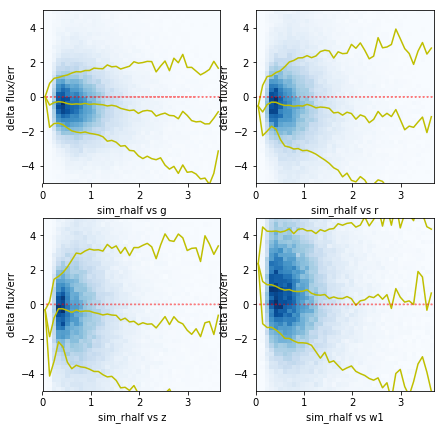

In [9]:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
one_subplot_stuff('sim_rhalf vs g',dat[i][sel[i]]['sim_rhalf'],flux_diff_g)

plt.subplot(2,2,2)
one_subplot_stuff('sim_rhalf vs r',dat[i][sel[i]]['sim_rhalf'],flux_diff_r)

plt.subplot(2,2,3)
one_subplot_stuff('sim_rhalf vs z',dat[i][sel[i]]['sim_rhalf'],flux_diff_z)

plt.subplot(2,2,4)
one_subplot_stuff('sim_rhalf vs w1',dat[i][sel[i]]['sim_rhalf'],delta_flux_w1)

In [10]:
flux_diff_g.shape

(107873,)

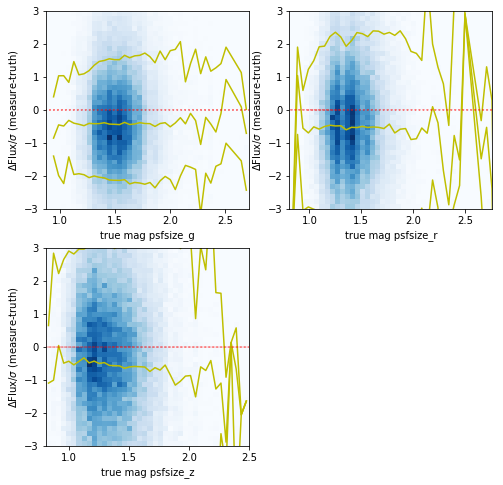

In [11]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
one_subplot_flux('psfsize_g',dat[i][sel[i]]['psfsize_g'],flux_diff_g)

plt.subplot(2,2,2)
one_subplot_flux('psfsize_r',dat[i][sel[i]]['psfsize_r'],flux_diff_r)

plt.subplot(2,2,3)
one_subplot_flux('psfsize_z',dat[i][sel[i]]['psfsize_z'],flux_diff_z)

#plt.subplot(2,2,4)
#one_subplot_flux('psfsize_w1',dat[i][sel]['psfsize_w1'],delta_flux_w1)

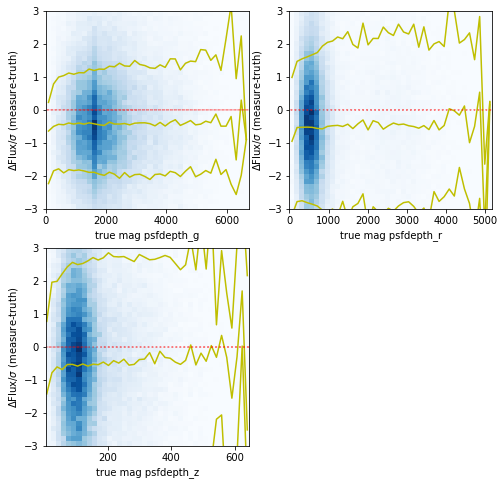

In [12]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
one_subplot_flux('psfdepth_g',dat[i][sel[i]]['psfdepth_g'],flux_diff_g,percentile=5)

plt.subplot(2,2,2)
one_subplot_flux('psfdepth_r',dat[i][sel[i]]['psfdepth_r'],flux_diff_r,percentile=5)

plt.subplot(2,2,3)
one_subplot_flux('psfdepth_z',dat[i][sel[i]]['psfdepth_z'],flux_diff_z,percentile=5)

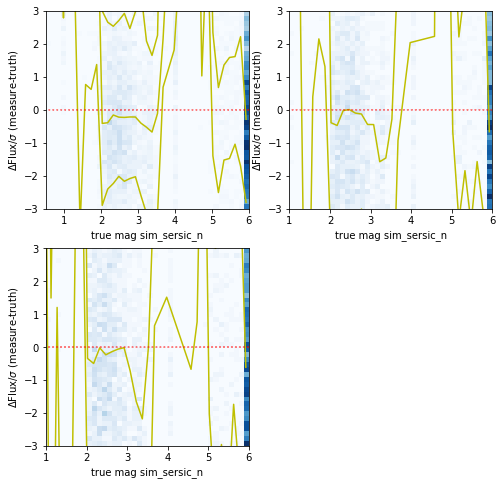

In [13]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sel_n = (dat[i][sel[i]]['type']=='SER')
one_subplot_flux('sim_sersic_n',dat[i][sel[i]][sel_n]['sim_sersic_n'],flux_diff_g[sel_n])
plt.subplot(2,2,2)
one_subplot_flux('sim_sersic_n',dat[i][sel[i]][sel_n]['sim_sersic_n'],flux_diff_r[sel_n])
plt.subplot(2,2,3)
one_subplot_flux('sim_sersic_n',dat[i][sel[i]][sel_n]['sim_sersic_n'],flux_diff_z[sel_n])

In [1]:
!ls /global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/cosmos_subsets

cosmos_ELG_like_set0.fits  cosmos_LRG_set0.fits       mask_values_set3_ELG.fits
cosmos_ELG_like_set1.fits  cosmos_LRG_set1.fits       mask_values_set3_LRG.fits
cosmos_ELG_like_set2.fits  cosmos_LRG_set2.fits       mask_values_set4.fits
cosmos_ELG_like_set3.fits  cosmos_LRG_set3.fits       mask_values_set4_ELG.fits
cosmos_ELG_like_set4.fits  cosmos_LRG_set4.fits       mask_values_set4_LRG.fits
cosmos_ELG_like_set5.fits  cosmos_LRG_set5.fits       mask_values_set5.fits
cosmos_ELG_like_set6.fits  cosmos_LRG_set6.fits       mask_values_set5_ELG.fits
cosmos_ELG_like_set7.fits  cosmos_LRG_set7.fits       mask_values_set5_LRG.fits
cosmos_ELG_like_set8.fits  cosmos_LRG_set8.fits       mask_values_set6.fits
cosmos_ELG_like_set9.fits  cosmos_LRG_set9.fits       mask_values_set6_ELG.fits
cosmos_ELG_set0.fits	   mask_values_set0.fits      mask_values_set6_LRG.fits
cosmos_ELG_set1.fits	   mask_values_set0_ELG.fits  mask_values_set7.fits
cosmos_ELG_set2.fits	   mask_values_set0_LRG.fits  mask_values

In [5]:
!ls /global/cscratch1/sd/dstn/dr9-cosmos-subs/80/tractor

149  150


In [7]:
import os
os.path.isdir('/global/cscratch1/sd/dstn/dr9-cosmos-subs/80/tractor')

True